# Model Selection (Cross Validation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm

In [2]:
%matplotlib inline
sns.set_context('poster')
sns.set_style("ticks")

In [3]:
nyc_cab_df = pd.read_csv(r'C:\Users\ashwi\Desktop\CS109\nyc_car_hire_data.csv',low_memory=False)

In [4]:
nyc_cab_df.head()

,AWND,Base,Day,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,Lpep_dropoff_datetime,MTA_tax,...,TMIN,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,Type,VendorID,lpep_pickup_datetime,Trip Length (min)
0,4.7,B02512,1,NaN,NaN,NaN,NaN,33.863498,2014-04-01 00:24:00,NaN,...,39,NaN,NaN,NaN,4.083561,NaN,1,NaN,2014-04-01 00:11:00,13.0
1,4.7,B02512,1,NaN,NaN,NaN,NaN,19.022892,2014-04-01 00:29:00,NaN,...,39,NaN,NaN,NaN,3.605694,NaN,1,NaN,2014-04-01 00:17:00,12.0
2,4.7,B02512,1,NaN,NaN,NaN,NaN,25.498981,2014-04-01 00:34:00,NaN,...,39,NaN,NaN,NaN,4.221763,NaN,1,NaN,2014-04-01 00:21:00,13.0
3,4.7,B02512,1,NaN,NaN,NaN,NaN,28.024628,2014-04-01 00:39:00,NaN,...,39,NaN,NaN,NaN,2.955510,NaN,1,NaN,2014-04-01 00:28:00,11.0
4,4.7,B02512,1,NaN,NaN,NaN,NaN,12.083589,2014-04-01 00:40:00,NaN,...,39,NaN,NaN,NaN,1.922292,NaN,1,NaN,2014-04-01 00:33:00,7.0


In [5]:
nyc_cab_sample = nyc_cab_df.sample(n=1000,random_state=6)
fares = nyc_cab_sample.Fare_amount.values
trip_length = nyc_cab_sample[['Trip Length (min)']].values

Text(0.5,1,'NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')

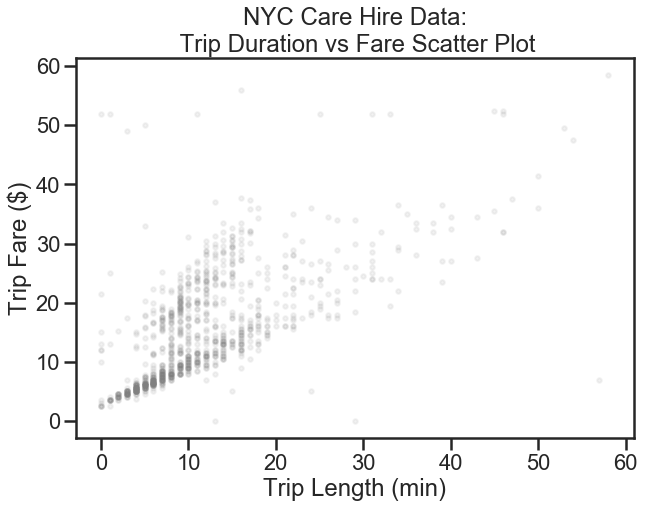

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(trip_length,fares,color = 'grey',alpha=0.1,s = 20)

plt.xlabel('Trip Length (min)')
plt.ylabel('Trip Fare ($)')
plt.title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')


Text(0.5,1,'NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')

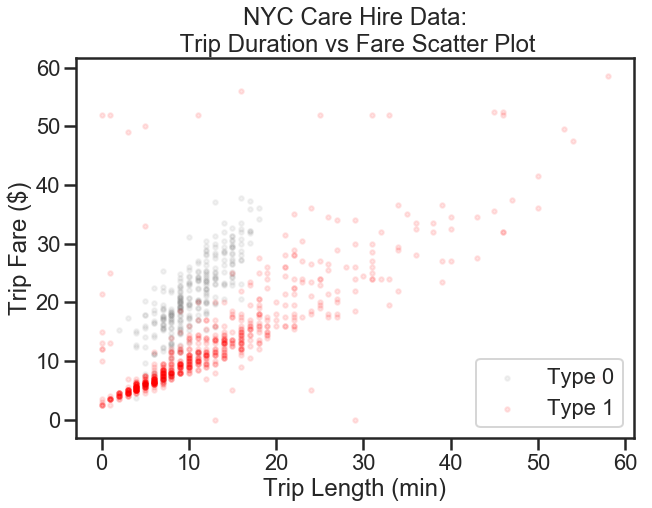

In [7]:
types = nyc_cab_sample.Type.values

idx_t1 = np.where(types == 1)
idx_t0 = np.where(types == 0)

fig,ax = plt.subplots(1,1,figsize = (10,7))

ax.scatter(trip_length[idx_t1],fares[idx_t1],alpha=0.1,s=20,color = 'gray',label = 'Type 0')
ax.scatter(trip_length[idx_t0],fares[idx_t0],alpha= 0.1 ,s = 20,color = 'red',label = 'Type 1')

ax.legend(loc = 'best')
ax.set_xlabel('Trip Length (min)')
ax.set_ylabel('Trip Fare ($)')
ax.set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')

In [8]:
npoints_train=8
X_train = np.random.uniform(low=0, high=1, size=npoints_train).reshape(-1,1)
X_train = np.sort(X_train,axis=0)
y_train = 1.2 + 2.3*X_train + np.random.normal(loc=0,scale=1,size=(npoints_train,1))

npoints_test = 8
X_test = np.random.uniform(low = 0,high=1,size=npoints_train).reshape(-1,1)
X_test = np.sort(X_test,axis=0)
y_test = 1.2 + 2.3*X_test + np.random.normal(loc=0,scale=1,size=(npoints_train,1))

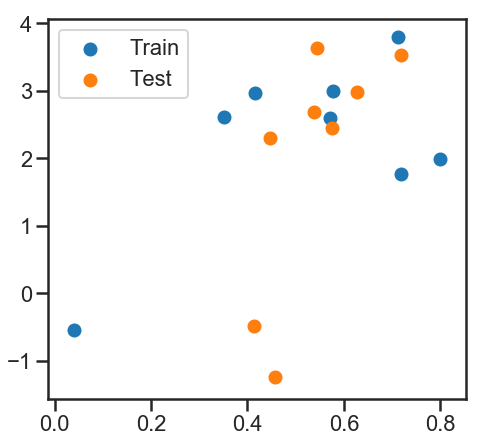

In [9]:
plt.figure(figsize=(7.5, 7))
plt.scatter(X_train,y_train,label = 'Train')
plt.scatter(X_test,y_test,label = 'Test')
plt.legend()

(-2, 5)

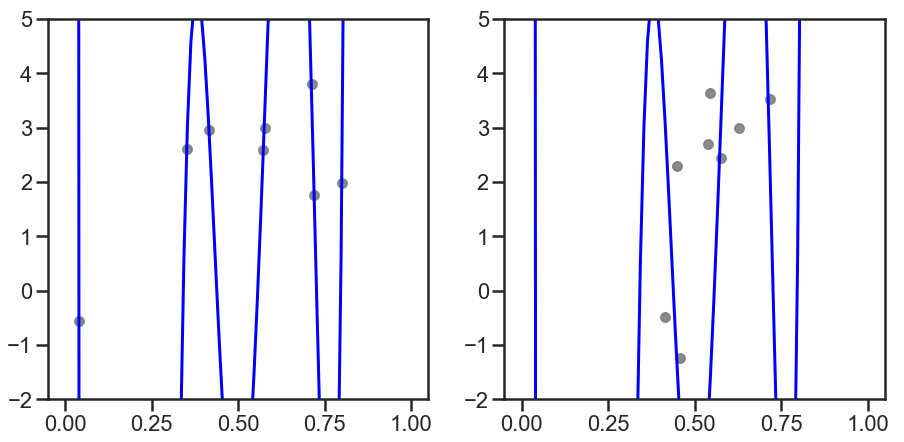

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

gen_poly_term = PolynomialFeatures(degree = 6)
X_train_with_poly = gen_poly_term.fit_transform(X_train)
X_test_with_poly = gen_poly_term.fit_transform(X_test)

poly_regression_model = LinearRegression(fit_intercept = True)
poly_regression_model.fit(X_train_with_poly,y_train)

X_general = np.linspace(0,1,100).reshape(-1,1)
X_general_with_poly = gen_poly_term.fit_transform(X_general)
y_general = poly_regression_model.predict(X_general_with_poly)

y_train_hat = poly_regression_model.predict(X_train_with_poly)
y_test_hat = poly_regression_model.predict(X_test_with_poly)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(X_general, y_general, 'b-' );
ax[0].scatter(X_train, y_train, color='gray', alpha=0.91, s=80)
ax[0].set_ylim((-2,5))

ax[1].plot(X_general, y_general, 'b-' );
ax[1].scatter(X_test, y_test, color='gray', alpha=0.91, s=80)

ax[1].set_ylim((-2,5))

In [11]:
X_general_with_poly.shape

(100, 7)

In [12]:
def train_test_split(df, n_samples, validation=False):
    if validation:
        nyc_cab_sample = df.sample(n=n_samples)

        nyc_cab_sample['lpep_pickup_datetime'] = nyc_cab_sample['lpep_pickup_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)
        nyc_cab_sample['Lpep_dropoff_datetime'] = nyc_cab_sample['Lpep_dropoff_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)

        msk = np.random.rand(len(nyc_cab_sample)) < 0.8
        non_test = nyc_cab_sample[msk]
        test = nyc_cab_sample[~msk]
        
        msk = np.random.rand(len(non_test)) < 0.7
        train = non_test[msk]
        validation = non_test[~msk]
        
        return train, validation, test
    
    else:
        nyc_cab_sample = df.sample(n=n_samples)

        nyc_cab_sample['lpep_pickup_datetime'] = nyc_cab_sample['lpep_pickup_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)
        nyc_cab_sample['Lpep_dropoff_datetime'] = nyc_cab_sample['Lpep_dropoff_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)

        msk = np.random.rand(len(nyc_cab_sample)) < 0.8
        train = nyc_cab_sample[msk]
        test = nyc_cab_sample[~msk]

        return train, test

## Examples of Overfitting

### Too Many Features 

In [13]:
train, test = train_test_split(nyc_cab_df, 500)
y_train = train['Fare_amount'].values
y_test = test['Fare_amount'].values

multi_regression_model = LinearRegression(fit_intercept=True)

cols = ['Trip Length (min)', 'Type', 'Trip_distance', 'TMAX', 'TMIN', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_longitude', 'Pickup_latitude', 'SNOW', 'SNWD', 'PRCP']

train_R_sq = []
test_R_sq = []
for i in range(1, len(cols) + 1):
    predictors = cols[:i]
    X_train = train[predictors].values
    X_test = test[predictors].values
    
    multi_regression_model.fit(X_train, y_train)
    
    train_R_sq.append(multi_regression_model.score(X_train, y_train))
    test_R_sq.append(multi_regression_model.score(X_test, y_test))

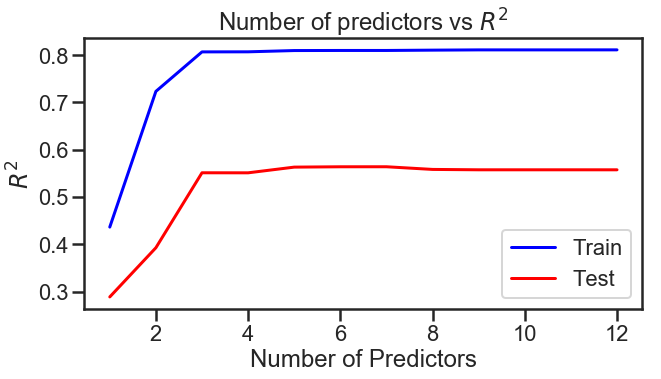

In [14]:
fig,ax = plt.subplots(1,1,figsize = (10,5))

ax.plot(range(1,len(cols)+1),train_R_sq,color = 'blue',label = 'Train')
ax.plot(range(1,len(cols)+1),test_R_sq,color = 'red',label = 'Test')

ax.set_xlabel('Number of Predictors')
ax.set_ylabel('$R^2$')
ax.set_title('Number of predictors vs $R^2$')

ax.legend()

### Too Hign Degree

In [15]:
from  sklearn.preprocessing import MinMaxScaler

train, test = train_test_split(nyc_cab_df, 5000)
y_train = train['Fare_amount'].values
y_test = test['Fare_amount'].values

poly_regression_model = LinearRegression(fit_intercept=False, normalize=True)

X_train = train[['Trip Length (min)']].values
X_test = test[['Trip Length (min)']].values



train_R_sq = []
test_R_sq = []
max_deg = 30

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

for d in range(1, max_deg):


    gen_poly_terms = PolynomialFeatures(degree=d)
    X_train_poly = gen_poly_terms.fit_transform(X_train)
    X_test_poly = gen_poly_terms.fit_transform(X_test)
    
    poly_regression_model.fit(X_train_poly, y_train)
    
    train_R_sq.append(poly_regression_model.score(X_train_poly, y_train))
    test_R_sq.append(poly_regression_model.score(X_test_poly, y_test))

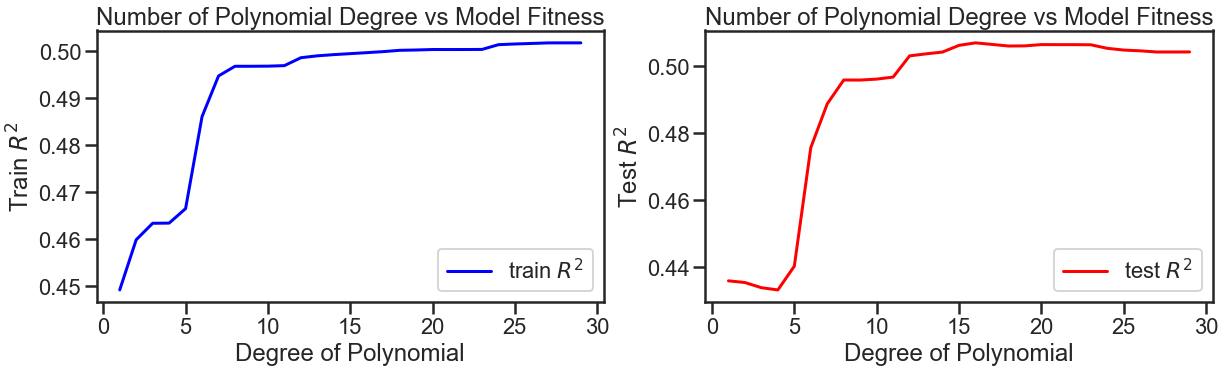

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(range(1, max_deg), np.array(train_R_sq), color='blue', label='train $R^2$')

ax[0].set_title('Number of Polynomial Degree vs Model Fitness')
ax[0].set_xlabel('Degree of Polynomial')
ax[0].set_ylabel('Train $R^2$')
ax[0].legend(loc='best')

ax[1].plot(range(1, max_deg), test_R_sq, color='red', label='test $R^2$')

ax[1].set_title('Number of Polynomial Degree vs Model Fitness')
ax[1].set_xlabel('Degree of Polynomial')
ax[1].set_ylabel('Test $R^2$')
ax[1].legend(loc='best')


plt.show()

## Stepwise Selection: For Selecting Number of Useful Features in Data

In [17]:
train, validation, test = train_test_split(nyc_cab_df, 5000, validation=True)

y_train = train['Fare_amount'].values
y_val = validation['Fare_amount'].values
y_test = test['Fare_amount'].values

regression_model = LinearRegression(fit_intercept=True)

### Forward Selection

In [18]:
all_predictors = ['Trip Length (min)', 'Type', 'Trip_distance', 'TMAX', 'TMIN', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_longitude', 'Pickup_latitude', 'SNOW', 'SNWD', 'PRCP']
predictors = [([], 0)]
regression_model = LinearRegression(fit_intercept=True)

for k in range(1, len(all_predictors)):
    best_k_minus_1 = predictors[-1][0]
    new_predictors = list(set(all_predictors) - set(best_k_minus_1))
    validation_R_sqs = []
    
    for predictor in new_predictors:
        k_predictors = best_k_minus_1 + [predictor]
        
        X_train = train[k_predictors].values
        X_val = validation[k_predictors].values
        
        if k ==1:
            X_train = X_train.reshape((len(X_train),1))
        regression_model.fit(X_train,y_train)
        validation_R_sqs.append(regression_model.score(X_val,y_val))
    
    best_k = best_k_minus_1 + [new_predictors[np.argmax(validation_R_sqs)]]
    predictors.append((best_k,np.max(validation_R_sqs)))
    
X_train = train[all_predictors].values
X_val = validation[all_predictors].values  
regression_model.fit(X_train, y_train)

predictors.append((all_predictors, regression_model.score(X_val, y_val)))

In [19]:
best_predictor_set = sorted(predictors, key=lambda t: t[1])[-1]
X_train = train[best_predictor_set[0]].values
X_val = validation[best_predictor_set[0]].values  
X_test = test[best_predictor_set[0]].values  

regression_model.fit(np.vstack((X_train, X_val)), np.hstack((y_train, y_val)))

print('Best predictor set: {}\nvalidation R^2: {}\ntest R^2: {}'.format(best_predictor_set[0], best_predictor_set[1], regression_model.score(X_test, y_test)))

Best predictor set: ['Trip_distance', 'Type', 'Trip Length (min)', 'lpep_pickup_datetime', 'SNWD', 'SNOW']
validation R^2: 0.7145107886464708
test R^2: 0.7020483590371809


In [20]:
import sys
from sklearn.model_selection import cross_val_score
non_test, test = train_test_split(nyc_cab_df, 5000)
regression_model = LinearRegression(fit_intercept=False)
min_max_scaler = MinMaxScaler()

y_trains = non_test['Fare_amount'].values
y_test = test['Fare_amount'].values

X_trains = non_test['Trip Length (min)'].values.reshape((len(non_test), 1))
X_test = test['Trip Length (min)'].values.reshape((len(test), 1))

X_trains = min_max_scaler.fit_transform(X_trains)
X_test = min_max_scaler.fit_transform(X_test)

In [22]:
x_val_scores = []

for d in range(1, 6):
    out = d * 1. / 6 * 100
    sys.stdout.write("\r%d%%" % out)
    validation_R_sqs = []
    gen_poly_terms = PolynomialFeatures(degree=d, interaction_only=False)
    X_trains_poly = gen_poly_terms.fit_transform(X_train)
    
    poly_reg = regression_model.fit(X_trains_poly, y_train)
    scores = cross_val_score(poly_reg, X_trains_poly, y_train, cv=10)
    x_val_scores.append(scores.mean())
sys.stdout.write("\r%d%%" % 100)

100%

[0.7906583155379872, 0.8061109505499205, -8.999913998418084, -544882.3383688816, -1228372446.7532983]


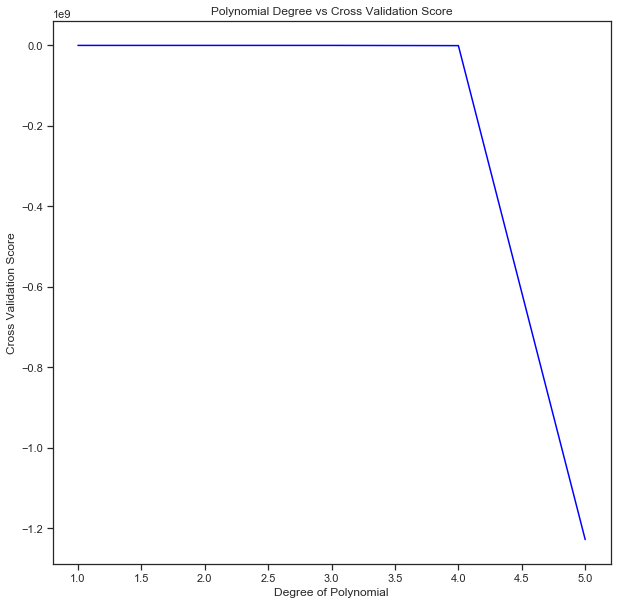

In [32]:
print(x_val_scores)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_context('notebook')
ax.plot(range(1, 6), x_val_scores, color='blue')

ax.set_title('Polynomial Degree vs Cross Validation Score')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Cross Validation Score')

plt.show()

In [57]:
from sklearn.neighbors import KNeighborsRegressor
x_val_scores = []
for k in range(1, 500):

    
    min_max_scaler = MinMaxScaler()

    y_trains = non_test['Fare_amount'].values
    y_test = test['Fare_amount'].values

    X_trains = non_test['Trip Length (min)'].values.reshape((len(non_test), 1))
    X_test = test['Trip Length (min)'].values.reshape((len(test), 1))

    X_trains = min_max_scaler.fit_transform(X_trains)
    X_test = min_max_scaler.fit_transform(X_test)
    
    out = k * 1. / 500 * 100
    sys.stdout.write("\r%d%%" % out)
    sys.stdout.flush()
    
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    scores = cross_val_score(knn_model,X_train,y_train, cv=10)
    x_val_scores.append(scores.mean())
sys.stdout.write("\r%d%%" % 100)

100%

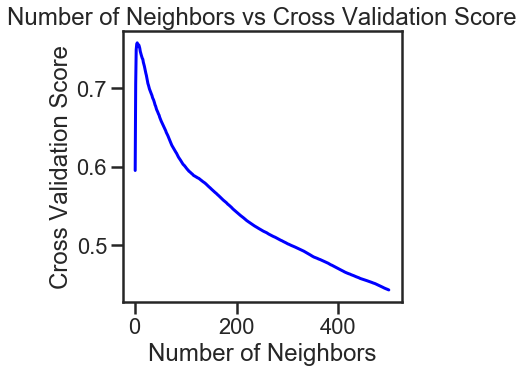

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(range(1, 500), x_val_scores, color='blue')

ax.set_title('Number of Neighbors vs Cross Validation Score')
ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Cross Validation Score')

plt.show()

In [62]:
best_k = range(1, 500)[np.argmax(x_val_scores)]

knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_trains, y_trains)
test_R_sq = knn_model.score(X_test, y_test)
print(x_val_scores[best_k])
print('best k is:', best_k)
print('the test R^2 for the model is: {}'.format(test_R_sq))

0.7562388845133695
best k is: 5
the test R^2 for the model is: 0.3353054840555777
